In [1]:
from load_config import load_config
from utils import model_from_config, load_newest
from plotting.plotting import compare, make_visual
from evaluator import Evaluator
from datasets.preprocessor import Preprocessor_2p5D
import torch
from torchsummary import summary
import numpy as np

device='cuda'

In [2]:
config = load_config()
checkpoints_path = config['checkpoint_dir']

In [3]:
net = model_from_config(config).to(device)

In [4]:
model_parameters = filter(lambda p: p.requires_grad, net.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f"{params:,}")

2,371,114


In [5]:
evaluator = Evaluator(config, net, device=device)

In [6]:
dice = evaluator.evaluate_checkpoint(88200)

Total slices = 530
idx=3 dice_score={'empty': 0.9992859363555908, 'liver': 0.9698290228843689, 'cancer': 0.23518604040145874}
Total slices = 667
idx=97 dice_score={'empty': 0.9985591769218445, 'liver': 0.9240731000900269, 'cancer': 0.7864072918891907}
Total slices = 626
idx=85 dice_score={'empty': 0.995987057685852, 'liver': 0.9182968139648438, 'cancer': 0.1593366265296936}
Total slices = 135
idx=32 dice_score={'empty': 0.9973832964897156, 'liver': 0.9576037526130676, 'cancer': 0.0}
Total slices = 812
idx=110 dice_score={'empty': 0.9995613694190979, 'liver': 0.9610822796821594, 'cancer': 0.6961672902107239}
Total slices = 641
idx=98 dice_score={'empty': 0.9990832209587097, 'liver': 0.9315929412841797, 'cancer': 0.8049381971359253}
Total slices = 767
idx=106 dice_score={'empty': 0.9993377923965454, 'liver': 0.9461132884025574, 'cancer': 0.0}
Total slices = 418
idx=122 dice_score={'empty': 0.9981564879417419, 'liver': 0.8873922228813171, 'cancer': 0.26772624254226685}
Total slices = 405

KeyboardInterrupt: 

In [5]:
net = load_newest(checkpoints_path, net, device)

In [6]:
evaluator = Evaluator(config, net, device=device)

In [7]:
pre = Preprocessor_2p5D(config)

In [9]:
dp = pre.process(97)
vol, seg = dp.full_vol, dp.full_seg
pred = evaluator.evaluate(vol)

batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torch.Size([9, 3, 512, 512])
batch.shape=torc

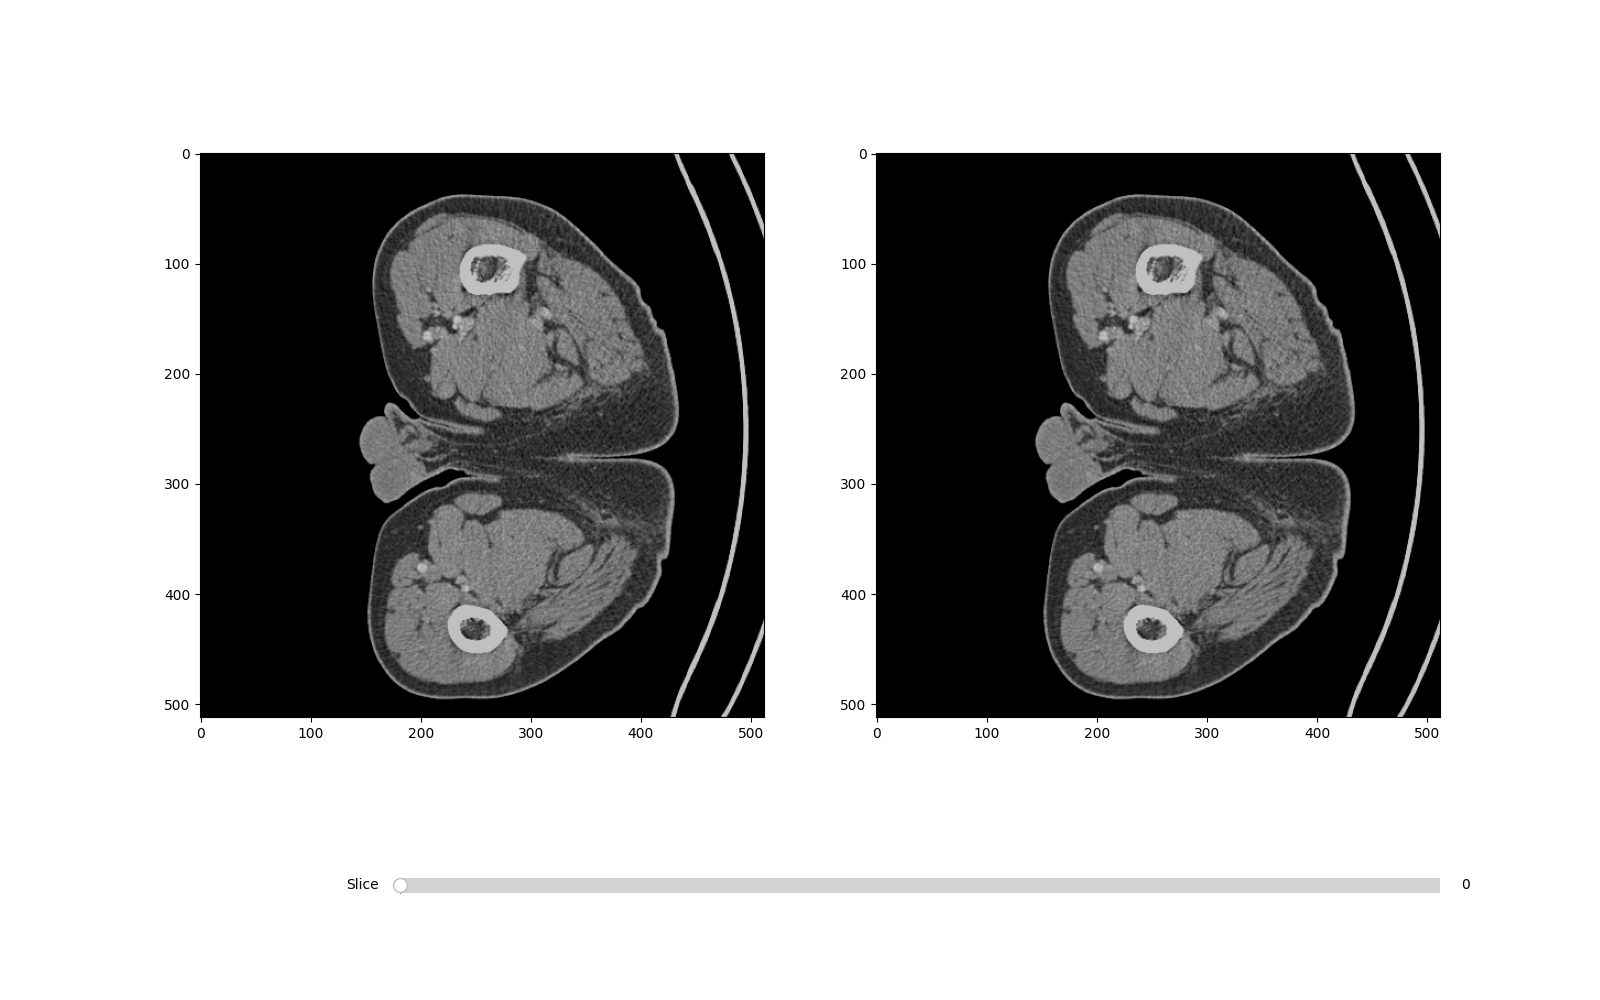

In [10]:
%matplotlib ipympl
slider = compare(vol, seg, pred)

In [ ]:
import matplotlib.pyplot as plt
plt.close()